<a href="https://colab.research.google.com/github/northpr/tensorflow-resources/blob/main/time_series/apple_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing and trading technique

Analyze and using tensorflow to predict on Apple stock market

## Data Preparation

In [ ]:
!wget https://raw.githubusercontent.com/northpr/helper_function/master/tensorflow/helper_tensorflow.py

--2022-10-06 14:22:46--  https://raw.githubusercontent.com/northpr/helper_function/master/tensorflow/helper_tensorflow.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7159 (7.0K) [text/plain]
Saving to: ‘helper_tensorflow.py.1’

helper_tensorflow.p 100%[===================>]   6.99K  --.-KB/s    in 0s      

2022-10-06 14:22:47 (64.0 MB/s) - ‘helper_tensorflow.py.1’ saved [7159/7159]



In [ ]:
from helper_tensorflow import *

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn")

Downloading Apple stock dataframe

In [ ]:
df = yf.download("AAPL",start="2005-01-01")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03 00:00:00-05:00,1.156786,1.162679,1.117857,1.130179,0.964983,691992000
2005-01-04 00:00:00-05:00,1.139107,1.169107,1.124464,1.141786,0.974893,1096810400
2005-01-05 00:00:00-05:00,1.151071,1.165179,1.143750,1.151786,0.983432,680433600
2005-01-06 00:00:00-05:00,1.154821,1.159107,1.130893,1.152679,0.984194,705555200
2005-01-07 00:00:00-05:00,1.160714,1.243393,1.156250,1.236607,1.055854,2227450400
...,...,...,...,...,...,...
2022-09-30 00:00:00-04:00,141.279999,143.100006,138.000000,138.199997,138.199997,124705400
2022-10-03 00:00:00-04:00,138.210007,143.070007,137.690002,142.449997,142.449997,114311700
2022-10-04 00:00:00-04:00,145.029999,146.220001,144.259995,146.100006,146.100006,87830100


In [ ]:
# We will focus only close time
df = df["Close"].to_frame()
df.head()

,Close
Date,
2005-01-03 00:00:00-05:00,1.130179
2005-01-04 00:00:00-05:00,1.141786
2005-01-05 00:00:00-05:00,1.151786
2005-01-06 00:00:00-05:00,1.152679
2005-01-07 00:00:00-05:00,1.236607


In [ ]:
df = df.rename(columns={"Close":"price"}).copy()
df.head()

,price
Date,
2005-01-03 00:00:00-05:00,1.130179
2005-01-04 00:00:00-05:00,1.141786
2005-01-05 00:00:00-05:00,1.151786
2005-01-06 00:00:00-05:00,1.152679
2005-01-07 00:00:00-05:00,1.236607


In [ ]:
df_apple = df.copy()
df_apple.head()

,price
Date,
2005-01-03 00:00:00-05:00,1.130179
2005-01-04 00:00:00-05:00,1.141786
2005-01-05 00:00:00-05:00,1.151786
2005-01-06 00:00:00-05:00,1.152679
2005-01-07 00:00:00-05:00,1.236607


### Include the percentage change of the Apple stock by day

In [ ]:
df_apple["pct_change"] = df_apple["price"].pct_change().dropna()

In [ ]:
df_apple.head()

,price,pct_change
Date,,
2005-01-03 00:00:00-05:00,1.130179,NaN
2005-01-04 00:00:00-05:00,1.141786,0.010270
2005-01-05 00:00:00-05:00,1.151786,0.008758
2005-01-06 00:00:00-05:00,1.152679,0.000775
2005-01-07 00:00:00-05:00,1.236607,0.072811


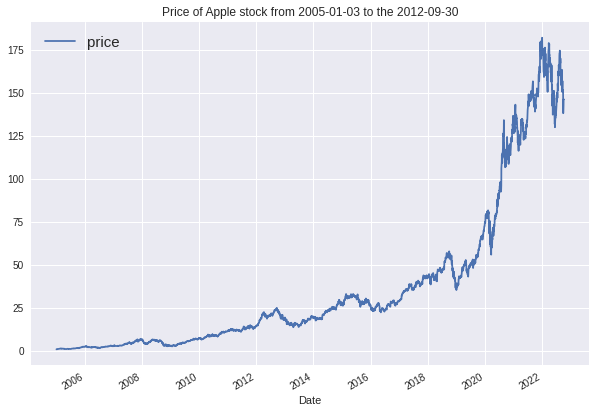

In [ ]:
df_apple["price"].plot(figsize=(10,7))
plt.title("Price of Apple stock from 2005-01-03 to the 2012-09-30")
plt.legend(fontsize=15)
plt.show();

### Finding the distribution of daily return

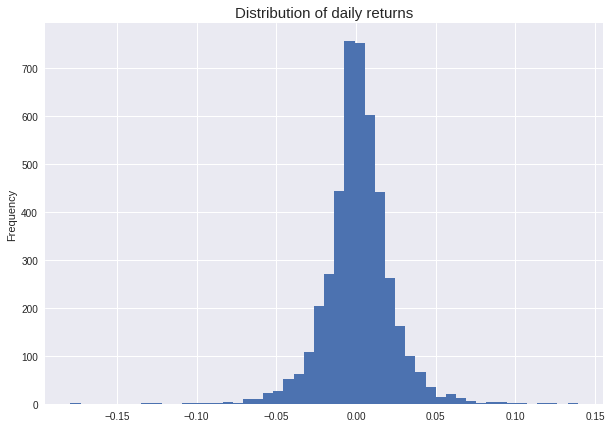

In [ ]:
df_apple["pct_change"].plot(kind="hist", figsize=(10,7), bins=50)
plt.title("Distribution of daily returns", fontsize=15)
plt.show();

We could see from the plot that majority of daily returns is zero percent

In [ ]:
df_mean_return = df_apple["pct_change"].mean()
df_var_return = df_apple["pct_change"].var()
df_std_return = df_apple["pct_change"].std() # or square root of

print(f"Daily mean return percent: {round(df_mean_return*100,4)}%\nDaily var return: {round(df_var_return,4)} \
\nDaily std return: {round(df_std_return,4)}")

Daily mean return percent: 0.1305%
Daily var return: 0.0004 
Daily std return: 0.0208


### Yearly return

In [ ]:
# Finding annualized returns
annual_mean_return = df_mean_return * 252
annual_var_return = df_var_return * 252
annual_std_return = df_std_return * 252

print(f"Annual mean return percent: {round(annual_mean_return*100,4)}%\nAnnual var return: {round(annual_var_return,4)} \
\nAnnual std return: {round(annual_std_return,4)}")

Annual mean return percent: 32.8748%
Annual var return: 0.109 
Annual std return: 5.2398


## Simple and Log returns

In [ ]:
df_apple_monthly = df_apple.copy()
df_apple_monthly.head()

,price,pct_change
Date,,
2005-01-03 00:00:00-05:00,1.130179,NaN
2005-01-04 00:00:00-05:00,1.141786,0.010270
2005-01-05 00:00:00-05:00,1.151786,0.008758
2005-01-06 00:00:00-05:00,1.152679,0.000775
2005-01-07 00:00:00-05:00,1.236607,0.072811


In [ ]:
# Getting the last day of every month
df_apple_monthly = df_apple_monthly.resample("M").last()
df_apple_monthly.head()

,price,pct_change
Date,,
2005-01-31 00:00:00-05:00,1.373214,0.039470
2005-02-28 00:00:00-05:00,1.602143,0.008203
2005-03-31 00:00:00-05:00,1.488214,-0.026402
2005-04-30 00:00:00-04:00,1.287857,0.014631
2005-05-31 00:00:00-04:00,1.420000,-0.019724


We will calculate monthly so we do not need to use daily `pct_change` anymore

In [ ]:
# remove pct_change and return find monthly return
df_apple_monthly = df_apple_monthly.iloc[:,0].to_frame()
df_apple_monthly.head()

,price
Date,
2005-01-31 00:00:00-05:00,1.373214
2005-02-28 00:00:00-05:00,1.602143
2005-03-31 00:00:00-05:00,1.488214
2005-04-30 00:00:00-04:00,1.287857
2005-05-31 00:00:00-04:00,1.420000


### Simple Return

In [ ]:
df_apple_monthly["monthly_change_percent"] = df_apple_monthly["price"].pct_change()
df_apple_monthly.head()

,price,monthly_change_percent
Date,,
2005-01-31 00:00:00-05:00,1.373214,NaN
2005-02-28 00:00:00-05:00,1.602143,0.166710
2005-03-31 00:00:00-05:00,1.488214,-0.071110
2005-04-30 00:00:00-04:00,1.287857,-0.134629
2005-05-31 00:00:00-04:00,1.420000,0.102607


❗️ We shouldn't simple return because it doesn't give us enough information. Trying to use log returns instead to prevent the misleading.

In [ ]:
# Finding simple mean return
simple_return = df_apple_monthly["monthly_change_percent"].mean()
simple_return_percent = round(simple_return,3)*100
print(f"Monthly simple return: {simple_return_percent}%")


Monthly simple return: 2.6%


### Log return

In [ ]:
df_apple_monthly.head()

,price,monthly_change_percent
Date,,
2005-01-31 00:00:00-05:00,1.373214,NaN
2005-02-28 00:00:00-05:00,1.602143,0.166710
2005-03-31 00:00:00-05:00,1.488214,-0.071110
2005-04-30 00:00:00-04:00,1.287857,-0.134629
2005-05-31 00:00:00-04:00,1.420000,0.102607


In [ ]:
df_apple_monthly["log_return"] = np.log(df_apple_monthly["price"]/df_apple_monthly["price"].shift(1))
df_apple_monthly.head()

,price,monthly_change_percent,log_return
Date,,,
2005-01-31 00:00:00-05:00,1.373214,NaN,NaN
2005-02-28 00:00:00-05:00,1.602143,0.166710,0.154188
2005-03-31 00:00:00-05:00,1.488214,-0.071110,-0.073765
2005-04-30 00:00:00-04:00,1.287857,-0.134629,-0.144597
2005-05-31 00:00:00-04:00,1.420000,0.102607,0.097677


Finding the mean of log return

In [ ]:
log_return = df_apple_monthly["log_return"].mean()
log_return_percent = log_return*100

log_return_value = 100*np.exp(36*log_return.mean())

print(log_return)
print(f"Log return: {round(log_return_percent,3)}%")

0.021914976563176713
Log return: 2.191%


## Momentum Trading

### SMA (Simple Moving Average) 
https://www.investopedia.com/terms/s/sma.asp#:~:text=A%20simple%20moving%20average%20(SMA)%20is%20an%20arithmetic%20moving%20average,periods%20in%20the%20calculation%20average.

In [ ]:
df_sma = df.copy()
df_sma.head()

,price
Date,
2005-01-03 00:00:00-05:00,1.130179
2005-01-04 00:00:00-05:00,1.141786
2005-01-05 00:00:00-05:00,1.151786
2005-01-06 00:00:00-05:00,1.152679
2005-01-07 00:00:00-05:00,1.236607


In [ ]:
df_sma["sma50"] = df_sma.rolling(window=50).mean()
df_sma.head()

,price,sma50
Date,,
2005-01-03 00:00:00-05:00,1.130179,NaN
2005-01-04 00:00:00-05:00,1.141786,NaN
2005-01-05 00:00:00-05:00,1.151786,NaN
2005-01-06 00:00:00-05:00,1.152679,NaN
2005-01-07 00:00:00-05:00,1.236607,NaN


In [ ]:
df_sma.tail()

,price,sma50
Date,,
2022-09-30 00:00:00-04:00,138.199997,159.734200
2022-10-03 00:00:00-04:00,142.449997,159.501400
2022-10-04 00:00:00-04:00,146.100006,159.364400
2022-10-05 00:00:00-04:00,146.399994,159.260399
2022-10-06 00:00:00-04:00,146.210007,159.048800


In [ ]:
df_sma["sma200"] = df_sma["price"].rolling(window=200).mean()
df_sma.tail()

,price,sma50,sma200
Date,,,
2022-09-30 00:00:00-04:00,138.199997,159.734200,159.86165
2022-10-03 00:00:00-04:00,142.449997,159.501400,159.67740
2022-10-04 00:00:00-04:00,146.100006,159.364400,159.54660
2022-10-05 00:00:00-04:00,146.399994,159.260399,159.42290
2022-10-06 00:00:00-04:00,146.210007,159.048800,159.30520


In [ ]:
df_sma.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4472 entries, 2005-01-03 00:00:00-05:00 to 2022-10-06 00:00:00-04:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4472 non-null   float64
 1   sma50   4423 non-null   float64
 2   sma200  4273 non-null   float64
dtypes: float64(3)
memory usage: 139.8 KB


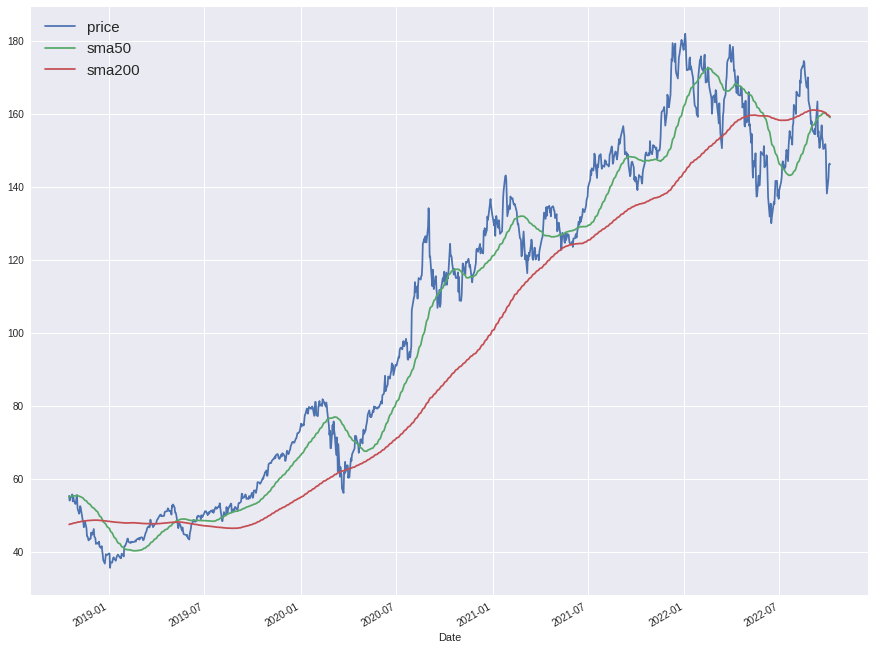

In [ ]:
df_sma.iloc[-1000:,:].plot(figsize=(15,12))
plt.legend(fontsize=15)

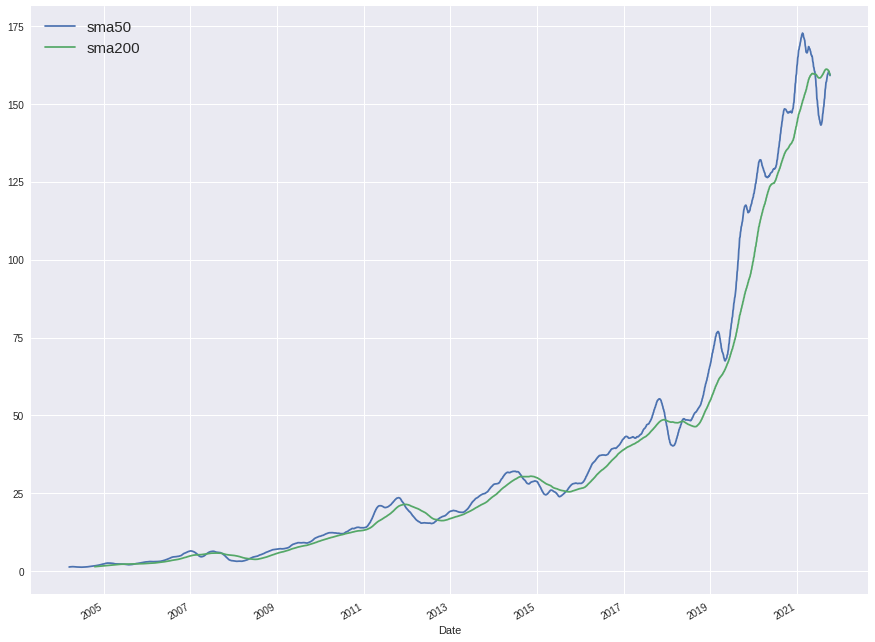

In [ ]:
df_sma.iloc[:,-2:].plot(figsize=(15,12))
plt.legend(fontsize=15)

From the plot above we should invest when `sma50 (blue line)` is above `sma20 (green line)`

### EWMA (Exponentially Weighted Moving Average)

In [ ]:
df_sma["ema50"] = df_sma["price"].ewm(span=100,min_periods=100).mean()
df_sma.tail()

,price,sma50,sma200,ema50
Date,,,,
2022-09-30 00:00:00-04:00,138.199997,159.734200,159.86165,155.640076
2022-10-03 00:00:00-04:00,142.449997,159.501400,159.67740,155.378887
2022-10-04 00:00:00-04:00,146.100006,159.364400,159.54660,155.195146
2022-10-05 00:00:00-04:00,146.399994,159.260399,159.42290,155.020985
2022-10-06 00:00:00-04:00,146.210007,159.048800,159.30520,154.846510


In [ ]:
df_sma.head()

,price,sma50,sma200,ema50
Date,,,,
2005-01-03 00:00:00-05:00,1.130179,NaN,NaN,NaN
2005-01-04 00:00:00-05:00,1.141786,NaN,NaN,NaN
2005-01-05 00:00:00-05:00,1.151786,NaN,NaN,NaN
2005-01-06 00:00:00-05:00,1.152679,NaN,NaN,NaN
2005-01-07 00:00:00-05:00,1.236607,NaN,NaN,NaN


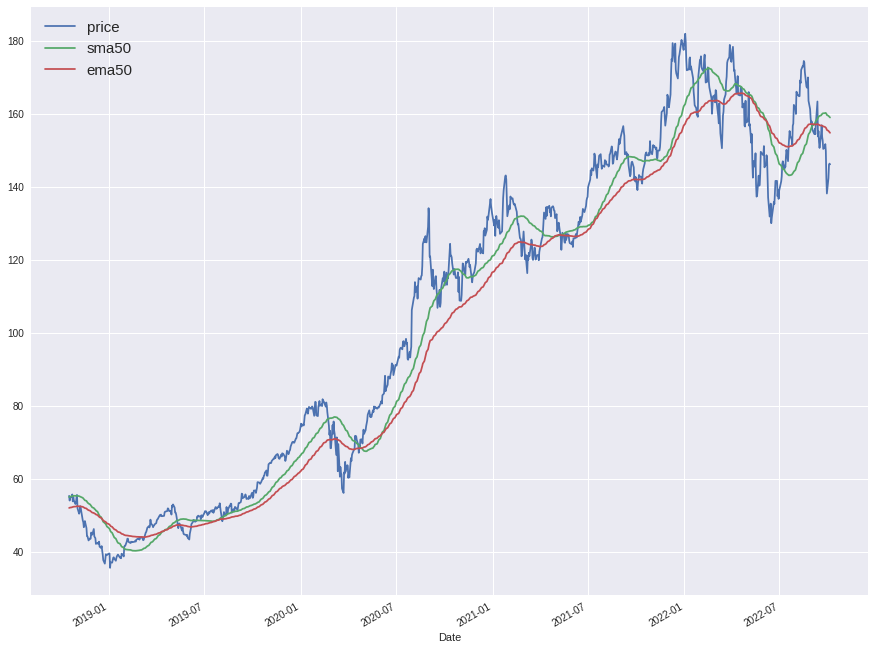

In [ ]:
df_sma.iloc[-1000:,[0,1,3]].plot(figsize=(15,12))
plt.legend(fontsize=15)

## Create FinancialAnalysis Class

In [ ]:
class FinancialAnalysis:
  """
  df = FinancialAnalysis("AAPL",start="2005-01-01", end="2022-01-01")
  """
  def __init__(self, ticker: str, start: str, end: str):
    self._ticker = ticker
    self.start = start
    self.end = end
    self.get_data()
    self.log_return()
  
  def __repr__(self):
    return (f"FinancialAnalysis(ticker='{self._ticker}', start='{self.start}', end='{self.end}')")

  def get_data(self):
    df = yf.download(self._ticker, start=self.start, end=self.end)["Close"].to_frame()
    df.rename(columns={"Close":"price"}, inplace=True)
    self.data = df

  # Create new column for multiple mathematical method #
  def log_return(self):
    self.data["log_return"] = np.log(self.data["price"]/self.data["price"].shift(1))

  def sma(self, column:str, window:int =50):
    """
    Simple Moving Average
    """
    column_name = f"{column}_sma{window}"
    self.data[column_name] = self.data[column].rolling(window).mean()
  
  def ewm(self, column, window=50):
    """
    Exponentially Weight Moving Area
    """
    column_name = f"{column}_ewm{window}"
    self.data[column_name] = self.data[column].ewm(span=window,min_periods=window).mean()

  def log_mean_return(self, freq=None):
    if freq is None:
      average_log_return_per = self.data["log_return"].mean()*100
      return average_log_return_per
    else:
      df_resample = self.data["price"].resample(freq).last()
      df_log_return = np.log(df_resample / df_resample.shift(1))
      log_return_mean = df_log_return.mean()
      log_return_mean_percent = log_return_mean*100
      return f"Percent of average log return per {freq} is: {round(log_return_mean_percent,3)}%"

  def plot_price(self):
    self.data["price"].plot(figsize=(10,7))
    plt.legend(fontsize=15)
    plt.title(f"Price chart: {self._ticker}",fontsize=15)

  def plot_return(self, kind="hist", bins=None):
    if bins==None:
      BINS=(int(np.sqrt(len(self.data))/2))
    if kind == "hist":
      self.data["log_return"].hist(figsize=(10,7), bins=BINS)
      plt.title(f"Histogram plot: {self._ticker} with bins: {BINS}")
    if kind == "ts":
      self.data["log_return"].plot(figsize=(10,7))
      plt.title(f"Return: {self._ticker}", fontsize=15)
  

In [ ]:
test = FinancialAnalysis("AAPL",start="2005-01-01", end="2022-09-30")
test

[*********************100%***********************]  1 of 1 completed


FinancialAnalysis(ticker='AAPL', start='2005-01-01', end='2022-09-30')

In [ ]:
test.sma("price", window=200)
test.ewm("price", window=200)
test.data.head()

,price,log_return,price_sma200,price_ewm200
Date,,,,
2005-01-03 00:00:00-05:00,1.130179,NaN,NaN,NaN
2005-01-04 00:00:00-05:00,1.141786,0.010218,NaN,NaN
2005-01-05 00:00:00-05:00,1.151786,0.008720,NaN,NaN
2005-01-06 00:00:00-05:00,1.152679,0.000775,NaN,NaN
2005-01-07 00:00:00-05:00,1.236607,0.070283,NaN,NaN


In [ ]:
test.data.tail()

,price,log_return,price_sma200,price_ewm200
Date,,,,
2022-09-23 00:00:00-04:00,150.429993,-0.015239,160.59220,155.394796
2022-09-26 00:00:00-04:00,150.770004,0.002258,160.47065,155.348778
2022-09-27 00:00:00-04:00,151.759995,0.006545,160.35665,155.313069
2022-09-28 00:00:00-04:00,149.839996,-0.012732,160.20860,155.258610
2022-09-29 00:00:00-04:00,142.479996,-0.050366,160.04230,155.131460


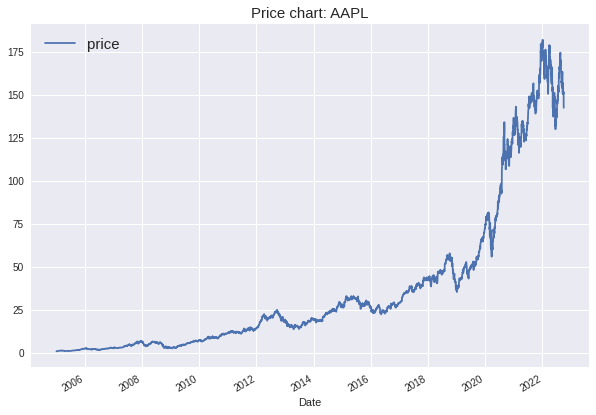

In [ ]:
test.plot_price()

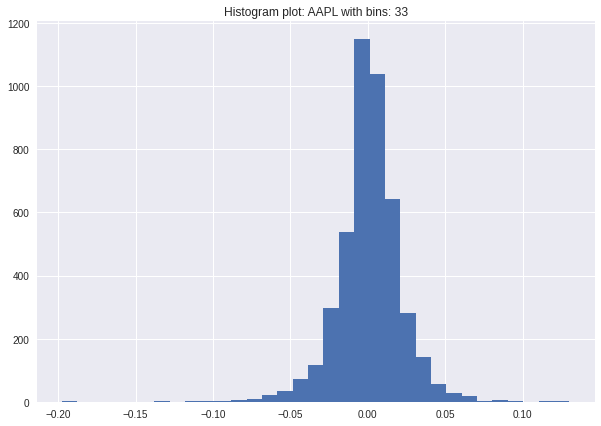

In [ ]:
test.plot_return()

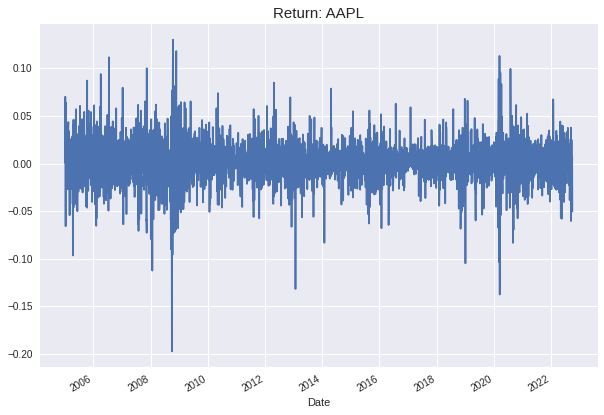

In [ ]:
test.plot_return(kind="ts")

# Tensorflow Time Series Forecasting

## Preparing the data

In [ ]:
apple = FinancialAnalysis("AAPL",start="2005-01-01", end="2022-09-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df_apple = apple.data
df_apple.head(10)

,price,log_return
Date,,
2005-01-03 00:00:00-05:00,1.130179,NaN
2005-01-04 00:00:00-05:00,1.141786,0.010218
2005-01-05 00:00:00-05:00,1.151786,0.008720
2005-01-06 00:00:00-05:00,1.152679,0.000775
2005-01-07 00:00:00-05:00,1.236607,0.070283
2005-01-10 00:00:00-05:00,1.231429,-0.004196
2005-01-11 00:00:00-05:00,1.152857,-0.065932
2005-01-12 00:00:00-05:00,1.168929,0.013845
2005-01-13 00:00:00-05:00,1.246429,0.064195


In [ ]:
df_apple = df_apple.iloc[:,0].to_frame()
df_apple

,price
Date,
2005-01-03 00:00:00-05:00,1.130179
2005-01-04 00:00:00-05:00,1.141786
2005-01-05 00:00:00-05:00,1.151786
2005-01-06 00:00:00-05:00,1.152679
2005-01-07 00:00:00-05:00,1.236607
...,...
2022-08-25 00:00:00-04:00,170.029999
2022-08-26 00:00:00-04:00,163.619995
2022-08-29 00:00:00-04:00,161.380005


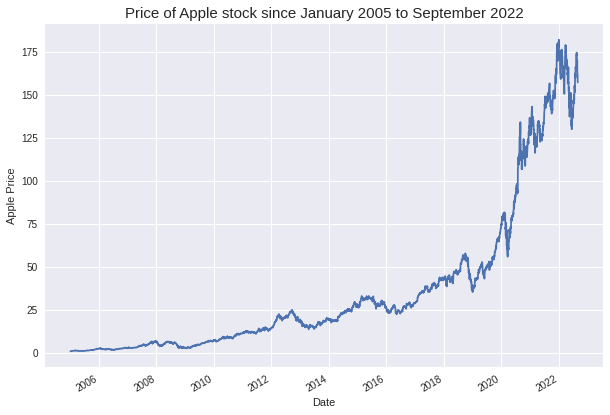

In [ ]:
df_apple["price"].plot(figsize=(10,7))
plt.title("Price of Apple stock since January 2005 to September 2022", fontsize=15)
plt.xlabel("Date")
plt.ylabel("Apple Price")
plt.show();

### Create train and test splits

In [ ]:
timestamps = df_apple.index.to_numpy()
prices = df_apple["price"].to_numpy()

timestamps[0:5], prices[0:5], timestamps.shape, prices.shape

(array([Timestamp('2005-01-03 00:00:00-0500', tz='America/New_York'),
        Timestamp('2005-01-04 00:00:00-0500', tz='America/New_York'),
        Timestamp('2005-01-05 00:00:00-0500', tz='America/New_York'),
        Timestamp('2005-01-06 00:00:00-0500', tz='America/New_York'),
        Timestamp('2005-01-07 00:00:00-0500', tz='America/New_York')],
       dtype=object),
 array([1.13017905, 1.14178598, 1.15178597, 1.15267897, 1.23660696]),
 (4447,),
 (4447,))

In [ ]:

split_size = int(0.8*(df_apple.shape[0]))

x_train, y_train = timestamps[0:split_size], prices[0:split_size]

x_test, y_test = timestamps[split_size:], prices[split_size:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3557,), (3557,), (890,), (890,))

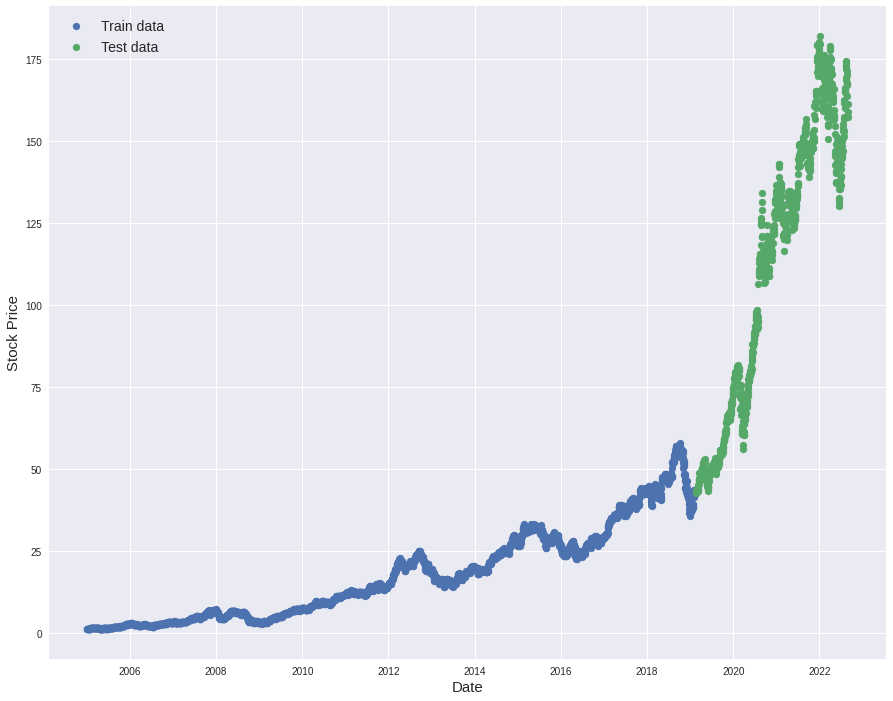

In [ ]:
# Plot the split
plt.figure(figsize=(15,12))
plt.scatter(x_train, y_train, label="Train data")
plt.scatter(x_test, y_test, label="Test data")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Stock Price", fontsize=15)
plt.legend(fontsize=14)

## Modeling Experiment
Horizon = number of timesteps to predict into future
Window = number of timesteps from past used to predict horizon

For example:
- 1 day in the futre using the previous week = 1 horizon, 7 window

All models experiment:
- Model 1: Dense model(Horizon=1, Window=7)
- Model 2: Dense model(Horizon=1, Window=30)
- Model 3: Dense model(Horizon=7, Window=30)
- Model 4: Conv1D(Horizon=1, Window=7)
- Model 5: LSTM(Horizon=1, Window=7)
- Model 6: 
- Model 7: 
- Model 8: 
- Model 9: 
- Model 10: 

## Making window and horizon
Window=7
Horizon=1
```
Window for one week (univariate time series)

[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

## Function: Make windows

In [ ]:
import tensorflow as tf
HORIZON = 1
WINDOW_SIZE = 7
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]], dtype=int32)>)

In [ ]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
full_windows[0:10], full_labels[0:10]

(array([[1.13017905, 1.14178598, 1.15178597, 1.15267897, 1.23660696,
         1.23142898, 1.15285695],
        [1.14178598, 1.15178597, 1.15267897, 1.23660696, 1.23142898,
         1.15285695, 1.16892898],
        [1.15178597, 1.15267897, 1.23660696, 1.23142898, 1.15285695,
         1.16892898, 1.24642897],
        [1.15267897, 1.23660696, 1.23142898, 1.15285695, 1.16892898,
         1.24642897, 1.25357103],
        [1.23660696, 1.23142898, 1.15285695, 1.16892898, 1.24642897,
         1.25357103, 1.26160705],
        [1.23142898, 1.15285695, 1.16892898, 1.24642897, 1.25357103,
         1.26160705, 1.24785697],
        [1.15285695, 1.16892898, 1.24642897, 1.25357103, 1.26160705,
         1.24785697, 1.258214  ],
        [1.16892898, 1.24642897, 1.25357103, 1.26160705, 1.24785697,
         1.258214  , 1.25874996],
        [1.24642897, 1.25357103, 1.26160705, 1.24785697, 1.258214  ,
         1.25874996, 1.26357102],
        [1.25357103, 1.26160705, 1.24785697, 1.258214  , 1.25874996,
    

In [ ]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [1.13017905 1.14178598 1.15178597 1.15267897 1.23660696 1.23142898
 1.15285695] -> Label: [1.16892898]
Window: [1.14178598 1.15178597 1.15267897 1.23660696 1.23142898 1.15285695
 1.16892898] -> Label: [1.24642897]
Window: [1.15178597 1.15267897 1.23660696 1.23142898 1.15285695 1.16892898
 1.24642897] -> Label: [1.25357103]


## Function: Train and test splits with windows and horizons for time-series

In [ ]:
# Train and test splits with windows
def make_train_test_splits(windows, labels, split_size=0.8):
  train_length = int(len(windows)*split_size)
  train_windows = windows[:train_length]
  test_windows = windows[train_length:]
  train_labels = labels[:train_length]
  test_labels = labels[train_length:]

  return train_windows, train_labels, test_windows, test_labels

In [ ]:
x_train, y_train, x_test, y_test = make_train_test_splits(full_windows, full_labels)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3552, 7), (3552, 1), (888, 7), (888, 1))

In [ ]:
x_train[0:5], y_train[0:5]

(array([[1.13017905, 1.14178598, 1.15178597, 1.15267897, 1.23660696,
         1.23142898, 1.15285695],
        [1.14178598, 1.15178597, 1.15267897, 1.23660696, 1.23142898,
         1.15285695, 1.16892898],
        [1.15178597, 1.15267897, 1.23660696, 1.23142898, 1.15285695,
         1.16892898, 1.24642897],
        [1.15267897, 1.23660696, 1.23142898, 1.15285695, 1.16892898,
         1.24642897, 1.25357103],
        [1.23660696, 1.23142898, 1.15285695, 1.16892898, 1.24642897,
         1.25357103, 1.26160705]]), array([[1.16892898],
        [1.24642897],
        [1.25357103],
        [1.26160705],
        [1.24785697]]))

## Create callbacks

In [ ]:
import os

def create_model_checkpoint(model_name, save_path="model_checkpoint"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

## Create Time Series Forecasting Models

### Model 1: Dense model

In [ ]:
x_train.shape

(3552, 7)

In [ ]:
WINDOW = 7
HORIZON = 1

import tensorflow as tf
from tensorflow.keras import layers

inputs = layers.Input(shape=(7,))
x = layers.Dense(128, activation="relu")(inputs)
outputs = layers.Dense(HORIZON)(x)

# Packing into a model
model_1 = tf.keras.Model(inputs, outputs)
model_1.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 7)]               0         
                                                                 
 dense_59 (Dense)            (None, 128)               1024      
                                                                 
 dense_60 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

In [ ]:
# Setting global variables
EPOCHS=20

In [ ]:
history_1 = model_1.fit(x_train,
                        y_train,
                        epochs=EPOCHS,
                        validation_data=(x_test, y_test),
                        callbacks=[create_model_checkpoint(model_name="model_1")])

Epoch 1/20
111/111 [==============================] - 1s 8ms/step - loss: 1.7299 - mae: 1.7299 - mse: 21.7293 - val_loss: 2.8996 - val_mae: 2.8996 - val_mse: 16.0538
Epoch 2/20
111/111 [==============================] - 1s 8ms/step - loss: 0.4233 - mae: 0.4233 - mse: 0.4541 - val_loss: 2.7629 - val_mae: 2.7629 - val_mse: 15.2135
Epoch 3/20
111/111 [==============================] - 1s 11ms/step - loss: 0.4313 - mae: 0.4313 - mse: 0.4610 - val_loss: 2.7316 - val_mae: 2.7316 - val_mse: 15.0446
Epoch 4/20
111/111 [==============================] - 1s 7ms/step - loss: 0.4005 - mae: 0.4005 - mse: 0.4036 - val_loss: 2.7014 - val_mae: 2.7014 - val_mse: 13.0564
Epoch 5/20
111/111 [==============================] - 1s 8ms/step - loss: 0.3592 - mae: 0.3592 - mse: 0.3280 - val_loss: 2.3368 - val_mae: 2.3368 - val_mse: 10.8796
Epoch 6/20
111/111 [==============================] - 1s 5ms/step - loss: 0.3526 - mae: 0.3526 - mse: 0.3276 - val_loss: 2.3421 - val_mae: 2.3421 - val_mse: 10.1624
Epoch 7/

In [ ]:
model_1 = tf.keras.models.load_model("model_checkpoint/model_1")

In [ ]:
model_1.evaluate(x_test, y_test)

28/28 [==============================] - 1s 5ms/step - loss: 1.8016 - mae: 1.8016 - mse: 6.4333


[1.8016098737716675, 1.8016098737716675, 6.433346748352051]

In [ ]:
forecast = model_1.predict(x_test)

model_1_results = evaluate_regression(forecast.squeeze(), tf.squeeze(y_test), mape=True, mase=True)
model_1_results, forecast.shape

({'mae': 1.8016096,
  'mse': 6.4333463,
  'rmse': 2.5364041,
  'mape': 1.6209062,
  'mase': 1.5809342},
 (888, 1))

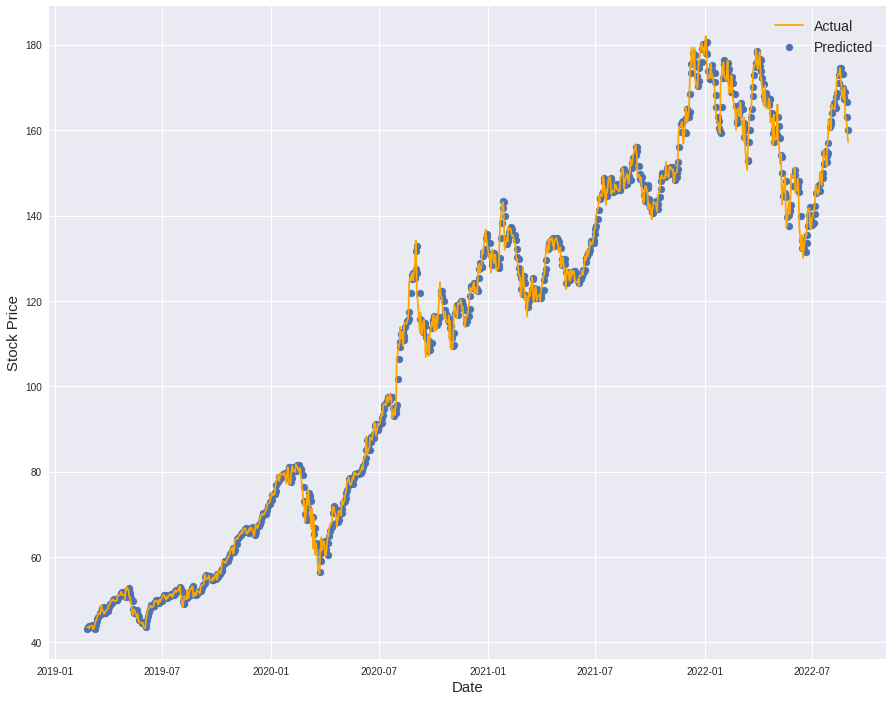

In [ ]:
# Plot the split
plt.figure(figsize=(15,12))
plt.scatter(timestamps[-len(x_test):], np.squeeze(forecast), label="Predicted")
plt.plot(timestamps[-len(x_test):], y_test, c="orange", label="Actual")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Stock Price", fontsize=15)
plt.legend(fontsize=14)

### Model 2: Dense model(Horizon=1, Window=30)

In [ ]:
HORIZON=1
WINDOW=30

In [ ]:
x, y = make_windows(prices, window_size=WINDOW, horizon=HORIZON)
len(x), len(y)

(4417, 4417)

In [ ]:
x_train, y_train, x_test, y_test = make_train_test_splits(windows=x, labels=y)
len(x_train), len(y_train), len(x_test), len(y_test)

(3533, 3533, 884, 884)

In [ ]:
inputs = layers.Input(shape=(WINDOW,))
x = layers.Dense(128, activation="relu")(inputs)
outputs = layers.Dense(HORIZON)(x)

model_2 = tf.keras.Model(inputs, outputs)
model_2.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 30)]              0         
                                                                 
 dense_61 (Dense)            (None, 128)               3968      
                                                                 
 dense_62 (Dense)            (None, 1)                 129       
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

model_2.fit(x_train,
            y_train,
            epochs=EPOCHS,
            verbose=0,
            validation_data=(x_test,y_test),
            callbacks=[create_model_checkpoint(model_name="model_2")])

In [ ]:
model_2 = tf.keras.models.load_model("model_checkpoint/model_2")
model_2.evaluate(x_test, y_test)

28/28 [==============================] - 0s 2ms/step - loss: 2.1962 - mae: 2.1962 - mse: 9.7561


[2.1961958408355713, 2.1961958408355713, 9.756056785583496]

In [ ]:
forecast = model_2.predict(x_test)

model_2_results = evaluate_regression(forecast.squeeze(), tf.squeeze(y_test), mape=True, mase=True)
model_2_results

{'mae': 2.1961958,
 'mse': 9.756055,
 'rmse': 3.1234684,
 'mape': 1.941011,
 'mase': 2.071163}

In [ ]:
model_1_results

{'mae': 1.8016096,
 'mse': 6.4333463,
 'rmse': 2.5364041,
 'mape': 1.6209062,
 'mase': 1.5809342}

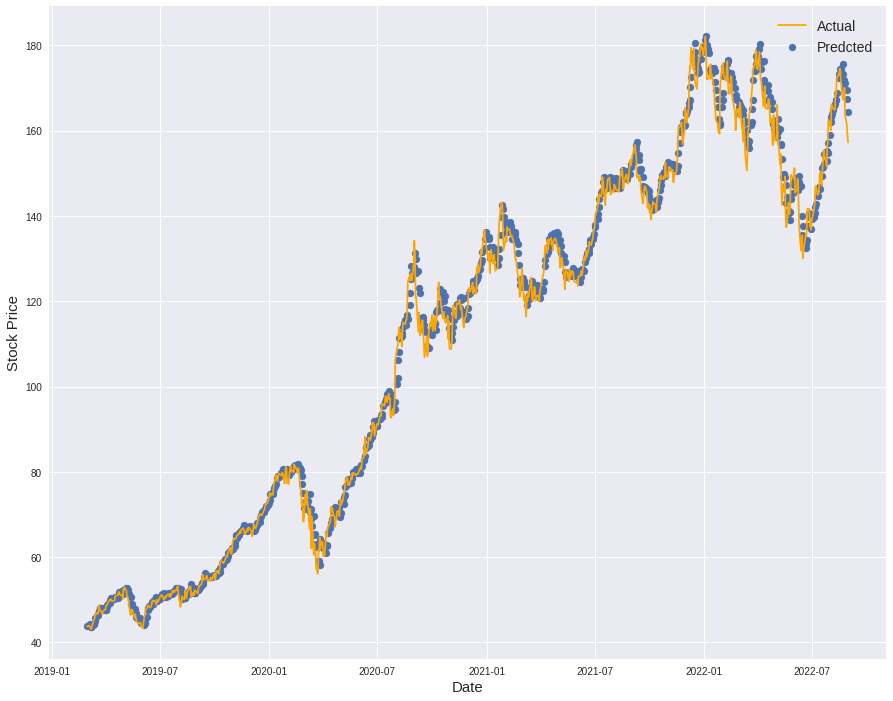

In [ ]:
# Plot the split
plt.figure(figsize=(15,12))
plt.scatter(timestamps[-len(x_test):], np.squeeze(forecast), label="Predcted")
plt.plot(timestamps[-len(x_test):], y_test, c="orange", label="Actual")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Stock Price", fontsize=15)
plt.legend(fontsize=14)

###  Model 3: Dense (window = 30, horizon = 7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

x, y = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(4440, 4440)

In [ ]:
x_train, y_train, x_test, y_test = make_train_test_splits(windows=x, labels=y, split_size=0.8)
len(x_train), len(x_test), len(y_train), len(y_test)

(3528, 883, 3528, 883)

In [ ]:
inputs = layers.Input(shape=(WINDOW_SIZE,))
x = layers.Dense(128, activation="relu")(inputs)
outputs = layers.Dense(HORIZON)(x)

model_3 = tf.keras.Model(inputs, outputs)
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

model_3.summary()

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 30)]              0         
                                                                 
 dense_63 (Dense)            (None, 128)               3968      
                                                                 
 dense_64 (Dense)            (None, 7)                 903       
                                                                 
Total params: 4,871
Trainable params: 4,871
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.fit(x_train, y_train,
            epochs=EPOCHS,
            verbose=0,
            validation_data=(x_test, y_test),
            callbacks=[create_model_checkpoint(model_name="model_3")])

In [ ]:
model_3 = tf.keras.models.load_model("model_checkpoint/model_3")
model_3.evaluate(x_test, y_test)

28/28 [==============================] - 0s 2ms/step - loss: 3.6769 - mae: 3.6769 - mse: 25.6717


[3.676903247833252, 3.676903247833252, 25.671728134155273]

In [ ]:
model_3_preds = model_3.predict(x_test)
model_3_preds[0:5]

array([[42.564346, 43.677868, 43.420704, 43.544563, 43.47888 , 42.587376,
        43.643093],
       [42.891476, 43.54233 , 43.471375, 43.705975, 43.164883, 43.042694,
        43.56504 ],
       [43.21439 , 43.203636, 43.214195, 43.86895 , 43.485306, 42.66432 ,
        43.750572],
       [43.305622, 43.556076, 43.65587 , 43.974934, 43.66852 , 42.840946,
        44.07816 ],
       [43.18936 , 43.751713, 43.563953, 43.778053, 43.570194, 43.161648,
        44.283035]], dtype=float32)

#### Function: Evaluation function for larger horizons

In [ ]:
# Create evaluation function work for larger horizons
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
model_3_results = evaluate_preds(y_true=(y_test),
                                 y_pred=model_3_preds)

model_3_results

{'mae': 3.6769032,
 'mse': 25.671732,
 'rmse': 4.183882,
 'mape': 3.310496,
 'mase': 2.2233853}

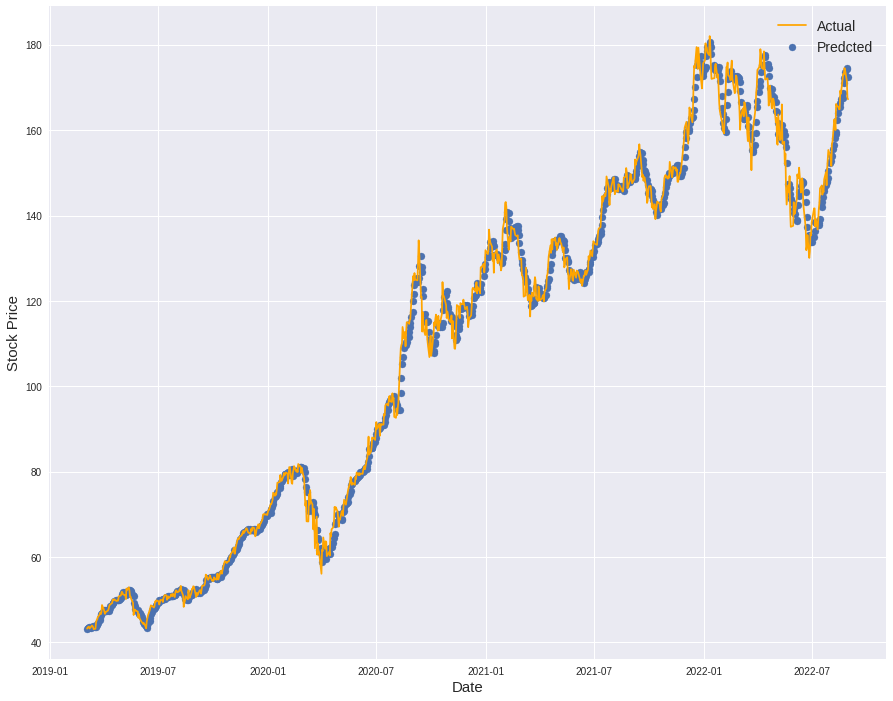

In [ ]:
model_3_mean_preds = tf.reduce_mean(model_3_preds,axis=1)
y_test_one = y_test[:,0]
# Plot the split
plt.figure(figsize=(15,12))
plt.scatter(timestamps[-len(x_test):], model_3_mean_preds, label="Predcted")
plt.plot(timestamps[-len(x_test):], y_test_one, c="orange", label="Actual")
plt.xlabel("Date", fontsize=15)
plt.ylabel("Stock Price", fontsize=15)
plt.legend(fontsize=14)

In [ ]:
tf.reduce_mean(model_3_preds,axis=1)

<tf.Tensor: shape=(883,), dtype=float32, numpy=
array([ 43.273834,  43.340538,  43.343056,  43.582874,  43.613995,
        43.408836,  43.550476,  43.627655,  43.806713,  43.824802,
        43.60952 ,  43.700054,  43.994175,  44.40028 ,  44.635284,
        45.16876 ,  45.781307,  46.421227,  46.57728 ,  46.79041 ,
        47.477394,  47.71812 ,  47.607502,  47.430355,  47.464844,
        47.496136,  47.42753 ,  47.691597,  48.01208 ,  48.53558 ,
        48.798496,  49.14678 ,  49.264866,  49.600777,  49.893616,
        50.00556 ,  49.92096 ,  49.920067,  49.885464,  50.232533,
        50.37983 ,  50.929115,  51.354603,  51.883842,  51.72265 ,
        51.523067,  51.463387,  51.136147,  51.455044,  51.744347,
        52.21093 ,  52.296673,  51.946896,  51.88055 ,  51.21343 ,
        50.773174,  49.208687,  48.474796,  47.871582,  47.665386,
        47.247746,  46.763287,  46.986927,  46.545532,  45.97056 ,
        45.331886,  44.714687,  44.367794,  43.874874,  43.7938  ,
        43.282

In [ ]:
y_test.shape

(883, 7)

In [ ]:
y_test[0:5]

array([[43.24250031, 43.55749893, 43.58250046, 43.71749878, 43.28749847,
        43.74250031, 43.96250153],
       [43.55749893, 43.58250046, 43.71749878, 43.28749847, 43.74250031,
        43.96250153, 43.88249969],
       [43.58250046, 43.71749878, 43.28749847, 43.74250031, 43.96250153,
        43.88249969, 43.63000107],
       [43.71749878, 43.28749847, 43.74250031, 43.96250153, 43.88249969,
        43.63000107, 43.125     ],
       [43.28749847, 43.74250031, 43.96250153, 43.88249969, 43.63000107,
        43.125     , 43.22750092]])

In [ ]:
y_test[:,0]

array([ 43.24250031,  43.55749893,  43.58250046,  43.71749878,
        43.28749847,  43.74250031,  43.96250153,  43.88249969,
        43.63000107,  43.125     ,  43.22750092,  44.72499847,
        45.22750092,  45.42750168,  45.93249893,  46.52999878,
        47.00500107,  46.63249969,  47.04000092,  48.77249908,
        47.76250076,  47.18500137,  46.69749832,  47.11750031,
        47.18000031,  47.48749924,  47.81000137,  48.50500107,
        48.83750153,  48.92250061,  49.25      ,  50.02500153,
        49.875     ,  50.15499878,  49.73749924,  49.71749878,
        49.80749893,  49.8125    ,  50.78250122,  50.96500015,
        51.13249969,  51.86999893,  51.79000092,  51.31999969,
        51.07500076,  51.15250015,  50.16749954,  52.63000107,
        52.28749847,  52.9375    ,  52.11999893,  50.71500015,
        50.72499847,  50.18000031,  49.29499817,  46.43000031,
        47.16500092,  47.72999954,  47.52000046,  47.25      ,
        45.77249908,  46.65000153,  45.69499969,  44.91

### Making quick comparison

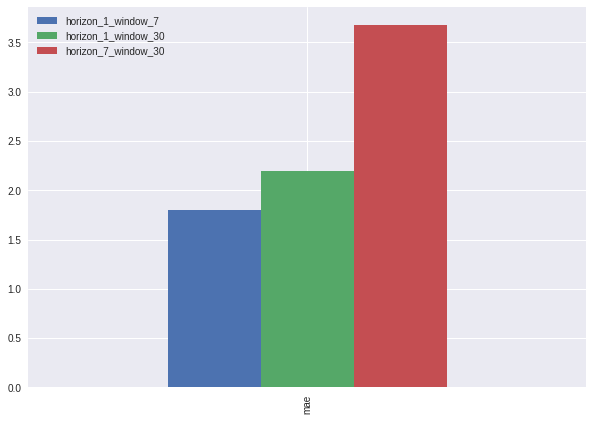

In [ ]:
pd.DataFrame({"horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

### Model 4: Conv1D (Windows=7, Horizon=1)

In [ ]:
HORIZON=1
WINDOW=7

# Create windowed dataset
x, y = make_windows(prices, window_size=WINDOW, horizon=HORIZON)
len(x), len(y)

(4440, 4440)

In [ ]:
# Create train/test splits
x_train, y_train, x_test, y_test = make_train_test_splits(windows=x, labels=y, split_size=0.8)
len(x_train), len(y_train), len(x_test), len(y_test),

(3552, 3552, 888, 888)

Because we're going to used Conv1D layers, we need to make sure the input shapes are correct.

The Conv1D layer in Tensorflow takes an input of: (`batch_size, timestps, input_dim`)

In our case, the batch_size (by default this is 32 but we can change it) is handled for us but the other values will be:
- `timesteps = WINDOW` (7) the `timesteps` also often referred to as `features`, our features are the previous `WINDOW` size value of stock.

- `input_dim = HORIZON` - our model views `WINDOW` (one week) worth of data at a time to predict `HORIZON` (one day)

Right now, our data has the `timesteps` dimension ready but we'll have to adjust it to have the `input_dim` dimension

In [ ]:
x_train[0], x_train[0].shape

(array([1.13017905, 1.14178598, 1.15178597, 1.15267897, 1.23660696,
        1.23142898, 1.15285695]), (7,))

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it
x = tf.constant(x_train[0])
x, tf.expand_dims(x, axis=1)

(<tf.Tensor: shape=(7,), dtype=float64, numpy=
 array([1.13017905, 1.14178598, 1.15178597, 1.15267897, 1.23660696,
        1.23142898, 1.15285695])>,
 <tf.Tensor: shape=(7, 1), dtype=float64, numpy=
 array([[1.13017905],
        [1.14178598],
        [1.15178597],
        [1.15267897],
        [1.23660696],
        [1.23142898],
        [1.15285695]])>)

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timestps

print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n{expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
[[1.130179]
 [1.141786]
 [1.151786]
 [1.152679]
 [1.236607]
 [1.231429]
 [1.152857]]


In [ ]:
inputs = layers.Input(shape=WINDOW)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)
model_4 = tf.keras.Model(inputs, outputs)
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

model_4.summary()

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 7)]               0         
                                                                 
 lambda_4 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 128)            4608      
                                                                 
 dense_65 (Dense)            (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_4 = model_4.fit(x_train, y_train,
                        epochs=EPOCHS,
                        validation_data=(x_test, y_test),
                        callbacks=[create_model_checkpoint(model_name="model_4")])

Epoch 1/20
111/111 [==============================] - 2s 10ms/step - loss: 1.8518 - mae: 1.8518 - mse: 25.4405 - val_loss: 2.9600 - val_mae: 2.9600 - val_mse: 17.5481
Epoch 2/20
111/111 [==============================] - 1s 9ms/step - loss: 0.3964 - mae: 0.3964 - mse: 0.3969 - val_loss: 2.7558 - val_mae: 2.7558 - val_mse: 13.9245
Epoch 3/20
111/111 [==============================] - 1s 9ms/step - loss: 0.3788 - mae: 0.3788 - mse: 0.3664 - val_loss: 2.5497 - val_mae: 2.5497 - val_mse: 12.6645
Epoch 4/20
111/111 [==============================] - 1s 9ms/step - loss: 0.3774 - mae: 0.3774 - mse: 0.3530 - val_loss: 2.4677 - val_mae: 2.4677 - val_mse: 12.0260
Epoch 5/20
111/111 [==============================] - 0s 3ms/step - loss: 0.3622 - mae: 0.3622 - mse: 0.3336 - val_loss: 2.9777 - val_mae: 2.9777 - val_mse: 14.8108
Epoch 6/20
111/111 [==============================] - 1s 9ms/step - loss: 0.3648 - mae: 0.3648 - mse: 0.3338 - val_loss: 2.3203 - val_mae: 2.3203 - val_mse: 10.5042
Epoch 7/

In [ ]:
model_4 = tf.keras.models.load_model("model_checkpoint/model_4")
model_4.evaluate(x_test, y_test)

28/28 [==============================] - 0s 2ms/step - loss: 1.8849 - mae: 1.8849 - mse: 6.8785


[1.884941577911377, 1.884941577911377, 6.878546714782715]

In [ ]:
model_4_preds = model_4.predict(x_test)
model_4_preds[0:5]

array([[[42.964203]],

       [[43.30504 ]],

       [[43.42906 ]],

       [[43.547836]],

       [[43.45723 ]]], dtype=float32)

In [ ]:
model_4_results = evaluate_preds(y_true=tf.squeeze(y_test),
                                 y_pred=tf.squeeze(model_4_preds))

model_4_results

{'mae': 1.8849416,
 'mse': 6.878547,
 'rmse': 2.6226985,
 'mape': 1.703327,
 'mase': 1.1397083}

### Model 5: RNN(LSTM)

In [ ]:
inputs = layers.Input(shape=(WINDOW))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
print(x.shape)
x = layers.LSTM(128, activation="relu", return_sequences=True)(x)
x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_5_lstm")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

model_5.summary()

(None, 1, 7)
Model: "model_5_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 7)]               0         
                                                                 
 lambda_5 (Lambda)           (None, 1, 7)              0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            69632     
                                                                 
 dense_66 (Dense)            (None, 1, 32)             4128      
                                                                 
 dense_67 (Dense)            (None, 1, 1)              33        
                                                                 
Total params: 73,793
Trainable params: 73,793
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_5 = model_5.fit(x_train, y_train,
                        epochs=EPOCHS,
                        validation_data=(x_test, y_test),
                        callbacks=[create_model_checkpoint(model_name="model_5")])

Epoch 1/20
109/111 [============================>.] - ETA: 0s - loss: 2.5627 - mae: 2.5627 - mse: 39.4757

111/111 [==============================] - 4s 28ms/step - loss: 2.5235 - mae: 2.5235 - mse: 38.7704 - val_loss: 2.5694 - val_mae: 2.5694 - val_mse: 13.0633
Epoch 2/20
111/111 [==============================] - ETA: 0s - loss: 0.3610 - mae: 0.3610 - mse: 0.3266

111/111 [==============================] - 3s 25ms/step - loss: 0.3610 - mae: 0.3610 - mse: 0.3266 - val_loss: 2.4583 - val_mae: 2.4583 - val_mse: 11.7432
Epoch 3/20
111/111 [==============================] - 1s 5ms/step - loss: 0.3353 - mae: 0.3353 - mse: 0.2882 - val_loss: 2.5170 - val_mae: 2.5170 - val_mse: 10.9203
Epoch 4/20
100/111 [==========================>...] - ETA: 0s - loss: 0.3446 - mae: 0.3446 - mse: 0.2895

111/111 [==============================] - 3s 25ms/step - loss: 0.3475 - mae: 0.3475 - mse: 0.2945 - val_loss: 2.0497 - val_mae: 2.0497 - val_mse: 8.2919
Epoch 5/20
111/111 [==============================] - 1s 5ms/step - loss: 0.3234 - mae: 0.3234 - mse: 0.2559 - val_loss: 2.1717 - val_mae: 2.1717 - val_mse: 8.5138
Epoch 6/20
105/111 [===========================>..] - ETA: 0s - loss: 0.3223 - mae: 0.3223 - mse: 0.2591

111/111 [==============================] - 3s 25ms/step - loss: 0.3207 - mae: 0.3207 - mse: 0.2562 - val_loss: 2.0125 - val_mae: 2.0125 - val_mse: 7.6144
Epoch 7/20
108/111 [============================>.] - ETA: 0s - loss: 0.3035 - mae: 0.3035 - mse: 0.2297

111/111 [==============================] - 3s 31ms/step - loss: 0.3020 - mae: 0.3020 - mse: 0.2274 - val_loss: 1.9292 - val_mae: 1.9292 - val_mse: 7.3773
Epoch 8/20
111/111 [==============================] - 1s 5ms/step - loss: 0.2928 - mae: 0.2928 - mse: 0.2163 - val_loss: 3.1992 - val_mae: 3.1992 - val_mse: 17.6438
Epoch 9/20
111/111 [==============================] - 1s 10ms/step - loss: 0.3229 - mae: 0.3229 - mse: 0.2647 - val_loss: 2.2667 - val_mae: 2.2667 - val_mse: 10.5234
Epoch 10/20
111/111 [==============================] - 1s 7ms/step - loss: 0.3065 - mae: 0.3065 - mse: 0.2373 - val_loss: 2.0340 - val_mae: 2.0340 - val_mse: 7.6793
Epoch 11/20
111/111 [==============================] - 1s 9ms/step - loss: 0.2884 - mae: 0.2884 - mse: 0.2162 - val_loss: 2.1592 - val_mae: 2.1592 - val_mse: 9.5107
Epoch 12/20
111/111 [==============================] - 1s 10ms/step - loss: 0.2945 - mae: 0.2945 - mse: 0.2233 - val_loss: 2.1321 - val_mae: 2.1321 - val_mse: 8.0492
Epoch 13/20
111/111

In [ ]:
model_5 = tf.keras.models.load_model("model_checkpoint/model_5")
model_5.evaluate(x_test, y_test)

28/28 [==============================] - 0s 3ms/step - loss: 1.9292 - mae: 1.9292 - mse: 7.3773


[1.9291744232177734, 1.9291744232177734, 7.37730073928833]

In [ ]:
model_5_preds = model_5.predict(x_test)
model_5_preds[0:5], model_5_preds.shape

(array([[[43.014885]],
 
        [[43.252384]],
 
        [[43.480816]],
 
        [[43.610943]],
 
        [[43.484455]]], dtype=float32), (888, 1, 1))

In [ ]:
tf.squeeze(model_5_preds)

<tf.Tensor: shape=(888,), dtype=float32, numpy=
array([ 43.014885,  43.252384,  43.480816,  43.610943,  43.484455,
        43.62595 ,  43.75062 ,  43.854313,  43.753437,  43.450844,
        43.334034,  43.877705,  44.54305 ,  45.06439 ,  45.508663,
        46.119137,  46.690266,  46.736153,  46.914158,  47.776054,
        47.964428,  47.70106 ,  47.10365 ,  47.11591 ,  47.106808,
        47.166218,  47.473255,  48.011703,  48.504795,  48.790123,
        49.06992 ,  49.571873,  49.83591 ,  50.042065,  49.92055 ,
        49.8751  ,  49.80113 ,  49.774776,  50.2331  ,  50.60425 ,
        50.980614,  51.42529 ,  51.716537,  51.66482 ,  51.326275,
        51.20216 ,  50.70528 ,  51.4502  ,  51.882317,  52.60321 ,
        52.3732  ,  51.71198 ,  51.16309 ,  50.419346,  49.817997,
        47.969135,  47.24798 ,  47.16659 ,  47.344112,  47.178562,
        46.463932,  46.58242 ,  46.044468,  45.48893 ,  44.913456,
        44.63267 ,  44.499958,  44.369503,  44.083263,  43.72332 ,
        44.117

In [ ]:
model_5_results = evaluate_preds(y_true=tf.squeeze(y_test),
                                y_pred=tf.squeeze(model_5_preds))

model_5_results

{'mae': 1.9291744,
 'mse': 7.3773007,
 'rmse': 2.7161186,
 'mape': 1.7290641,
 'mase': 1.1664531}

In [ ]:
model_4_results

{'mae': 1.8849416,
 'mse': 6.878547,
 'rmse': 2.6226985,
 'mape': 1.703327,
 'mase': 1.1397083}

## Making a window dataset to create multi-variate model

In [ ]:
df_apple.head()

,price
Date,
2005-01-03 00:00:00-05:00,1.130179
2005-01-04 00:00:00-05:00,1.141786
2005-01-05 00:00:00-05:00,1.151786
2005-01-06 00:00:00-05:00,1.152679
2005-01-07 00:00:00-05:00,1.236607


In [ ]:
WINDOW, HORIZON = 7,1
df_apple_windowed = df_apple.copy()

for i in range(WINDOW):
  df_apple_windowed[f"price_{i+1}"] = df_apple_windowed["price"].shift(i+1)
df_apple_windowed.head(10)

,price,price_1,price_2,price_3,price_4,price_5,price_6,price_7
Date,,,,,,,,
2005-01-03 00:00:00-05:00,1.130179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-04 00:00:00-05:00,1.141786,1.130179,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-05 00:00:00-05:00,1.151786,1.141786,1.130179,NaN,NaN,NaN,NaN,NaN
2005-01-06 00:00:00-05:00,1.152679,1.151786,1.141786,1.130179,NaN,NaN,NaN,NaN
2005-01-07 00:00:00-05:00,1.236607,1.152679,1.151786,1.141786,1.130179,NaN,NaN,NaN
2005-01-10 00:00:00-05:00,1.231429,1.236607,1.152679,1.151786,1.141786,1.130179,NaN,NaN
2005-01-11 00:00:00-05:00,1.152857,1.231429,1.236607,1.152679,1.151786,1.141786,1.130179,NaN
2005-01-12 00:00:00-05:00,1.168929,1.152857,1.231429,1.236607,1.152679,1.151786,1.141786,1.130179
2005-01-13 00:00:00-05:00,1.246429,1.168929,1.152857,1.231429,1.236607,1.152679,1.151786,1.141786


In [ ]:
df_apple_windowed.dropna(inplace=True)

### Model 6: Dense (multivariate time series)

In [ ]:
# Let's create x&y data frame
x = df_apple_windowed.drop("price", axis=1).astype(np.float32)
y = df_apple_windowed["price"].astype(np.float32)

x.head(), y

(                            price_1   price_2   price_3   price_4   price_5  \
 Date                                                                          
 2005-01-12 00:00:00-05:00  1.152857  1.231429  1.236607  1.152679  1.151786   
 2005-01-13 00:00:00-05:00  1.168929  1.152857  1.231429  1.236607  1.152679   
 2005-01-14 00:00:00-05:00  1.246429  1.168929  1.152857  1.231429  1.236607   
 2005-01-18 00:00:00-05:00  1.253571  1.246429  1.168929  1.152857  1.231429   
 2005-01-19 00:00:00-05:00  1.261607  1.253571  1.246429  1.168929  1.152857   
 
                             price_6   price_7  
 Date                                           
 2005-01-12 00:00:00-05:00  1.141786  1.130179  
 2005-01-13 00:00:00-05:00  1.151786  1.141786  
 2005-01-14 00:00:00-05:00  1.152679  1.151786  
 2005-01-18 00:00:00-05:00  1.236607  1.152679  
 2005-01-19 00:00:00-05:00  1.231429  1.236607  , Date
 2005-01-12 00:00:00-05:00      1.168929
 2005-01-13 00:00:00-05:00      1.246429
 2005-0

In [ ]:
y

Date
2005-01-12 00:00:00-05:00      1.168929
2005-01-13 00:00:00-05:00      1.246429
2005-01-14 00:00:00-05:00      1.253571
2005-01-18 00:00:00-05:00      1.261607
2005-01-19 00:00:00-05:00      1.247857
                                ...    
2022-08-25 00:00:00-04:00    170.029999
2022-08-26 00:00:00-04:00    163.619995
2022-08-29 00:00:00-04:00    161.380005
2022-08-30 00:00:00-04:00    158.910004
2022-08-31 00:00:00-04:00    157.220001
Name: price, Length: 4440, dtype: float32

In [ ]:
# Split the train and test sets
split_size = int(len(x)*0.8)

x_train, y_train = x[:split_size], y[:split_size]
x_test, y_test = x[split_size:], y[split_size:]

len(x_train), len(y_train), len(x_test), len(y_test)

(3552, 3552, 888, 888)

In [ ]:
y_train

Date
2005-01-12 00:00:00-05:00     1.168929
2005-01-13 00:00:00-05:00     1.246429
2005-01-14 00:00:00-05:00     1.253571
2005-01-18 00:00:00-05:00     1.261607
2005-01-19 00:00:00-05:00     1.247857
                               ...    
2019-02-15 00:00:00-05:00    42.605000
2019-02-19 00:00:00-05:00    42.732498
2019-02-20 00:00:00-05:00    43.007500
2019-02-21 00:00:00-05:00    42.764999
2019-02-22 00:00:00-05:00    43.242500
Name: price, Length: 3552, dtype: float32

In [ ]:
HORIZON

1

In [ ]:
inputs = layers.Input(shape=(7,))
x = layers.Dense(128, activation="relu")(inputs)
outputs = layers.Dense(HORIZON)(x)
model_6 = tf.keras.Model(inputs=inputs,
                          outputs=outputs)

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mse","mae"])

model_6.summary()

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 7)]               0         
                                                                 
 dense_68 (Dense)            (None, 128)               1024      
                                                                 
 dense_69 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_6 = model_6.fit(x_train,
                        y_train,
                        epochs=EPOCHS,
                        validation_data=(x_test, y_test),
                        callbacks=[create_model_checkpoint(model_name="model_6")])




Epoch 1/20
111/111 [==============================] - 1s 8ms/step - loss: 0.7756 - mse: 3.6309 - mae: 0.7756 - val_loss: 2.3608 - val_mse: 10.3228 - val_mae: 2.3608
Epoch 2/20
111/111 [==============================] - 0s 3ms/step - loss: 0.3354 - mse: 0.2899 - mae: 0.3354 - val_loss: 2.5128 - val_mse: 11.0606 - val_mae: 2.5128
Epoch 3/20
111/111 [==============================] - 1s 7ms/step - loss: 0.3266 - mse: 0.2755 - mae: 0.3266 - val_loss: 2.1384 - val_mse: 9.1528 - val_mae: 2.1384
Epoch 4/20
111/111 [==============================] - 1s 7ms/step - loss: 0.3052 - mse: 0.2432 - mae: 0.3052 - val_loss: 2.1252 - val_mse: 9.2281 - val_mae: 2.1252
Epoch 5/20
111/111 [==============================] - 0s 2ms/step - loss: 0.3005 - mse: 0.2405 - mae: 0.3005 - val_loss: 2.3805 - val_mse: 9.9287 - val_mae: 2.3805
Epoch 6/20
111/111 [==============================] - 0s 3ms/step - loss: 0.3076 - mse: 0.2538 - mae: 0.3076 - val_loss: 2.4281 - val_mse: 10.1775 - val_mae: 2.4281
Epoch 7/20
11

In [ ]:
model_6 = tf.keras.models.load_model("model_checkpoint/model_6")
model_6.evaluate(x_test, y_test)

28/28 [==============================] - 0s 2ms/step - loss: 1.7819 - mse: 6.4259 - mae: 1.7819


[1.781863808631897, 6.425852298736572, 1.781863808631897]

In [ ]:
model_6_preds = model_6.predict(x_test)
model_6_preds[0:5], model_6_preds.shape, y_test.shape

(array([[43.252136],
        [43.559418],
        [43.697567],
        [43.854103],
        [43.657654]], dtype=float32), (888, 1), (888,))

In [ ]:
model_6_results = evaluate_preds(y_true=tf.squeeze(y_test),
                                y_pred=tf.squeeze(model_6_preds))
model_6_results

{'mae': 1.7818637,
 'mse': 6.425852,
 'rmse': 2.5349264,
 'mape': 1.6012572,
 'mase': 1.0773834}

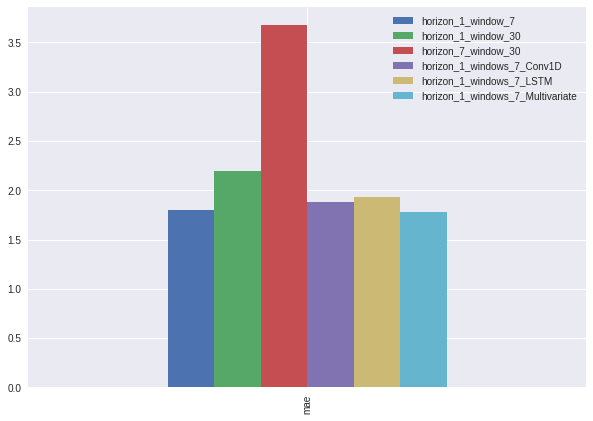

In [ ]:
model_comparison = pd.DataFrame({"horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"],
              "horizon_1_windows_7_Conv1D": model_4_results["mae"],
              "horizon_1_windows_7_LSTM": model_5_results["mae"],
              "horizon_1_windows_7_Multivariate": model_6_results["mae"],}, index=["mae"])

model_comparison.plot(figsize=(10, 7), kind="bar");

### Model 7: Ensembme Model

#### Prepare the data for better performance by using tf.data

In [ ]:
# Turn train and test arrays into tensor datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(x_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(x_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine features&labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch for optimal performance.
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>)

In [ ]:
x_train

,price_1,price_2,price_3,price_4,price_5,price_6,price_7
Date,,,,,,,
2005-01-12 00:00:00-05:00,1.152857,1.231429,1.236607,1.152679,1.151786,1.141786,1.130179
2005-01-13 00:00:00-05:00,1.168929,1.152857,1.231429,1.236607,1.152679,1.151786,1.141786
2005-01-14 00:00:00-05:00,1.246429,1.168929,1.152857,1.231429,1.236607,1.152679,1.151786
2005-01-18 00:00:00-05:00,1.253571,1.246429,1.168929,1.152857,1.231429,1.236607,1.152679
2005-01-19 00:00:00-05:00,1.261607,1.253571,1.246429,1.168929,1.152857,1.231429,1.236607
...,...,...,...,...,...,...,...
2019-02-15 00:00:00-05:00,42.700001,42.544998,42.722500,42.357498,42.602501,42.735001,43.560001
2019-02-19 00:00:00-05:00,42.605000,42.700001,42.544998,42.722500,42.357498,42.602501,42.735001
2019-02-20 00:00:00-05:00,42.732498,42.605000,42.700001,42.544998,42.722500,42.357498,42.602501


In [ ]:
WINDOW

7

In [ ]:
def get_ensemble_models(window=WINDOW,
                        horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=["mae","mse","mape"]):
  """
  Returns a list of num_item models each trained on MAE, MSE and MAPE loss

  For example, if num_item=10, a list of 30 trained models will be returned: 10*len(["mae","mse","mape"]).
  """

  ensemble_models = []

  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number:{i}")

      # Construct a simple model
      inputs = layers.Input(shape=(WINDOW,))
      x = layers.Dense(128, activation="relu", kernel_initializer="he_normal")(inputs)
      x = layers.Dense(128, activation="relu", kernel_initializer="he_normal")(x)
      outputs = layers.Dense(HORIZON)(x)
      model = tf.keras.Model(inputs, outputs)

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["mae","mse"])
      
      # Fit the model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      ensemble_models.append(model)

  return ensemble_models

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number:0
Optimizing model by reducing: mse for 1000 epochs, model number:0

Epoch 813: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 913: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number:0

Epoch 497: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 798: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 904: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number:1

Epoch 112: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number:1

Epoch 542: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 642: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing:

In [ ]:
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.squeeze(ensemble_preds)

In [ ]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

<tf.Tensor: shape=(15, 888), dtype=float32, numpy=
array([[ 43.298668,  43.59251 ,  43.70956 , ..., 166.63477 , 163.37495 ,
        160.48723 ],
       [ 43.19854 ,  43.577522,  43.63186 , ..., 163.91356 , 162.11044 ,
        159.6858  ],
       [ 43.23325 ,  43.53848 ,  43.61513 , ..., 163.79141 , 161.4774  ,
        159.25946 ],
       ...,
       [ 43.272636,  43.871616,  43.59338 , ..., 164.9538  , 160.5173  ,
        161.89743 ],
       [ 43.35854 ,  43.689262,  43.58333 , ..., 163.8408  , 163.12953 ,
        160.6173  ],
       [ 43.25811 ,  43.56807 ,  43.63776 , ..., 163.99709 , 161.78075 ,
        158.98186 ]], dtype=float32)>

In [ ]:
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

<tf.Tensor: shape=(15, 888), dtype=float32, numpy=
array([[ 43.298668,  43.59251 ,  43.70956 , ..., 166.63477 , 163.37495 ,
        160.48723 ],
       [ 43.19854 ,  43.577522,  43.63186 , ..., 163.91356 , 162.11044 ,
        159.6858  ],
       [ 43.23325 ,  43.53848 ,  43.61513 , ..., 163.79141 , 161.4774  ,
        159.25946 ],
       ...,
       [ 43.272636,  43.871616,  43.59338 , ..., 164.9538  , 160.5173  ,
        161.89743 ],
       [ 43.35854 ,  43.689262,  43.58333 , ..., 163.8408  , 163.12953 ,
        160.6173  ],
       [ 43.25811 ,  43.56807 ,  43.63776 , ..., 163.99709 , 161.78075 ,
        158.98186 ]], dtype=float32)>

In [ ]:
model_7_results = evaluate_preds(y_true=y_test,
                                y_pred=np.median(ensemble_preds, axis=0))

model_7_results

{'mae': 1.6414666,
 'mse': 5.477338,
 'rmse': 2.3403714,
 'mape': 1.493017,
 'mase': 0.992494}

In [ ]:
model_comparison["horizon_1_window_7_ensemble"] = model_7_results["mae"]
model_comparison.T

,mae
horizon_1_window_7,1.801610
horizon_1_window_30,2.196196
horizon_7_window_30,3.676903
horizon_1_windows_7_Conv1D,1.884942
horizon_1_windows_7_LSTM,1.929174
horizon_1_windows_7_Multivariate,1.781864
horizon_1_window_7_ensemble,1.641467


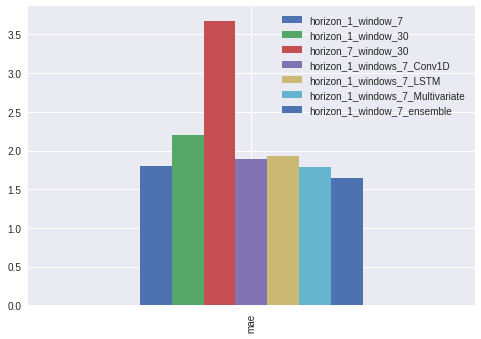

In [ ]:
model_comparison.plot(kind="bar")
plt.plot(figsize=(10,7))
plt.show()